In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from seaborn import load_dataset 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import svm

csv_path = 'resume.csv'
data_raw = pd.read_csv(csv_path)
display(data_raw)

pd.set_option('display.max_columns', None)
data_raw.head()

#trim data
# honor, computer_skills, special_skills, volunteeer, firstname, job_req_computer, job_req_school, job_ad_id, job_city
data = data_raw.drop(["honors", "computer_skills", "special_skills", "volunteer", "firstname", "job_req_school", "job_ad_id","job_city"], axis='columns')
display(data)
#print(data_raw[['job_req_min_experience']].to_string(index=False)) #just trying to examine entire column quickly
#print(data_raw[['job_type']].to_string(index=False))
#print(data_raw[['job_city']].to_string(index=False))
#find unique values in column job_type
print(pd.unique(data['job_type']))
#one hot encode job_type, race, etc.:


#replace NaN in years_experience with 0
data['job_req_min_experience'] = data['job_req_min_experience'].fillna(0)
#print(data[['job_req_min_experience']].to_string(index=False))
no_some_data = data.drop(data[data['job_req_min_experience'] == 'some'].index)
#mean = no_some_data["job_req_min_experience"].mean()
#jreqcol = no_some_data["job_req_min_experience"]

data['job_req_min_experience'] = data['job_req_min_experience'].replace('some', 1) #some = 1 year of experience for now

#jreqcol_num = jreqcol.drop(jreqcol[jreqcol['jreqcol'] == 'some'].index)
display(jreqcol)


ohencode_df = pd.get_dummies(data, columns = ['job_ownership','job_type','race','job_industry','job_fed_contractor','gender','resume_quality'])
display(ohencode_df)


,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_min_experience,job_req_computer,job_req_organization,job_req_school,received_callback,firstname,race,gender,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,none_listed,0,Allison,white,f,4,1,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,none_listed,0,Kristen,white,f,3,0,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,none_listed,0,Lakisha,black,f,4,1,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,none_listed,0,Latonya,black,f,3,0,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,some,1,1,none_listed,0,Carrie,white,f,3,0,0,1,22,1,0,0,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,1344,Boston,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,NaN,1,0,none_listed,0,Tamika,black,f,3,0,0,0,1,1,1,0,0,1,0,low
4866,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,NaN,0,0,none_listed,0,Ebony,black,f,4,1,0,1,6,1,0,0,0,0,0,low
4867,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,NaN,0,0,none_listed,0,Jay,white,m,4,1,0,1,8,1,0,1,0,0,1,high
4868,382,Boston,other_service,manager,NaN,0,unknown,0,0,0,NaN,0,0,none_listed,0,Latonya,black,f,4,1,0,1,2,1,0,1,1,0,1,high


,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_min_experience,job_req_computer,job_req_organization,received_callback,race,gender,years_college,college_degree,worked_during_school,years_experience,military,employment_holes,has_email_address,resume_quality
0,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,0,white,f,4,1,0,6,0,1,0,low
1,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,0,white,f,3,0,1,6,1,0,1,high
2,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,0,black,f,4,1,1,6,0,0,0,low
3,manufacturing,supervisor,NaN,1,unknown,1,0,0,5,1,0,0,black,f,3,0,0,6,0,1,1,high
4,other_service,secretary,0.0,1,nonprofit,1,0,0,some,1,1,0,white,f,3,0,1,22,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,finance_insurance_real_estate,secretary,0.0,0,private,1,0,0,NaN,1,0,0,black,f,3,0,0,1,0,1,0,low
4866,other_service,manager,NaN,0,unknown,0,0,0,NaN,0,0,0,black,f,4,1,1,6,0,0,0,low
4867,other_service,manager,NaN,0,unknown,0,0,0,NaN,0,0,0,white,m,4,1,1,8,0,0,1,high
4868,other_service,manager,NaN,0,unknown,0,0,0,NaN,0,0,0,black,f,4,1,1,2,1,0,1,high


['supervisor' 'secretary' 'sales_rep' 'retail_sales' 'manager' 'clerical']


0       5
1       5
2       5
3       5
5       0
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: job_req_min_experience, Length: 3806, dtype: object

,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_min_experience,job_req_computer,job_req_organization,received_callback,years_college,college_degree,worked_during_school,years_experience,military,employment_holes,has_email_address,job_ownership_nonprofit,job_ownership_private,job_ownership_public,job_ownership_unknown,job_type_clerical,job_type_manager,job_type_retail_sales,job_type_sales_rep,job_type_secretary,job_type_supervisor,race_black,race_white,job_industry_business_and_personal_service,job_industry_finance_insurance_real_estate,job_industry_manufacturing,job_industry_other_service,job_industry_transportation_communication,job_industry_wholesale_and_retail_trade,job_fed_contractor_0.0,job_fed_contractor_1.0,gender_f,gender_m,resume_quality_high,resume_quality_low
0,1,1,0,0,5,1,0,0,4,1,0,6,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,1,1,0,0,5,1,0,0,3,0,1,6,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,1,1,0,0,5,1,0,0,4,1,1,6,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1
3,1,1,0,0,5,1,0,0,3,0,0,6,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
4,1,1,0,0,1,1,1,0,3,0,1,22,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,0,1,0,0,0,1,0,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4866,0,0,0,0,0,0,0,0,4,1,1,6,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4867,0,0,0,0,0,0,0,0,4,1,1,8,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
4868,0,0,0,0,0,0,0,0,4,1,1,2,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


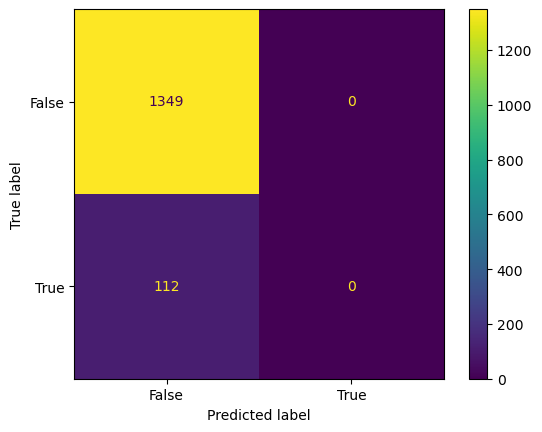

C:\Users\lauren\AppData\Local\Temp\ipykernel_10948\3211458028.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


,Precision,Recall,Accuracy,F1-Score
0,NaN,0.0,0.92334,NaN


Precision: 0.0
Recall: 0.0


C:\Users\lauren\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#X = ohencode_df[["job_equal_opp_employer", "job_req_any","job_req_communication","job_req_education","job_req_min_experience","job_req_computer","job_req_organization","years_college","college_degree","worked_during_school","years_experience","military","employment_holes"]]
X = ohencode_df[["years_experience", "years_college"]]

features_df = ohencode_df.drop('received_callback', axis=1)
#X = ohencode_df.loc[: ,ohencode_df.columns != 'received_callback']
#X = features_df.columns
y = ohencode_df["received_callback"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ker = svm.SVC(kernel='linear')

ker.fit(X_train, y_train)

y_pred = ker.predict(X_test)

#confusion matrix
conmatrix = metrics.confusion_matrix(y_test,y_pred)
conmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conmatrix, display_labels = [False, True])
conmatrix_display.plot()
plt.show()

#Observation Table for age and oldpeak
TN, FP, FN, TP = conmatrix.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
acc = (TP+TN)/(TP + FP + TN + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
results_df1 = pd.DataFrame({
    'Precision': [precision],
    'Recall': [recall],
    'Accuracy': [acc],
    'F1-Score': [f1_score]
})

display(results_df1)
#delete
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

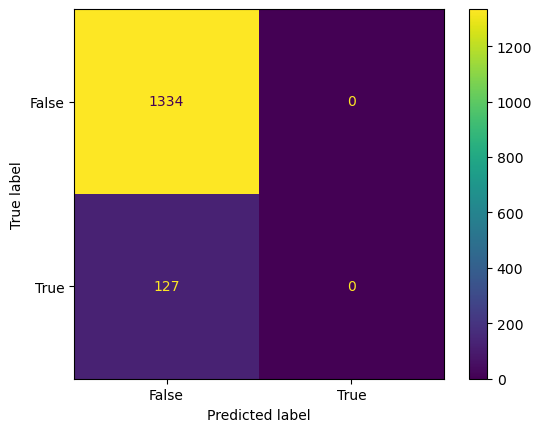

C:\Users\lauren\AppData\Local\Temp\ipykernel_10948\1700997422.py:24: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


,Precision,Recall,Accuracy,F1-Score
0,NaN,0.0,0.913073,NaN


Precision: 0.0
Recall: 0.0


C:\Users\lauren\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
#log regression
#Note: only using two features to test for now, as more features may potentially confuse model
X = ohencode_df[["years_experience", "years_college"]]
y = ohencode_df["received_callback"]

features_df = ohencode_df.drop('received_callback', axis=1)
#X = ohencode_df.loc[: ,ohencode_df.columns != 'received_callback']
#X = features_df.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#confusion matrix
conmatrix = metrics.confusion_matrix(y_test,y_pred)
conmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conmatrix, display_labels = [False, True])
conmatrix_display.plot()
plt.show()

#Observation Table 
TN, FP, FN, TP = conmatrix.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
acc = (TP+TN)/(TP + FP + TN + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
results_df1 = pd.DataFrame({
    'Precision': [precision],
    'Recall': [recall],
    'Accuracy': [acc],
    'F1-Score': [f1_score]
})

display(results_df1)
#delete
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

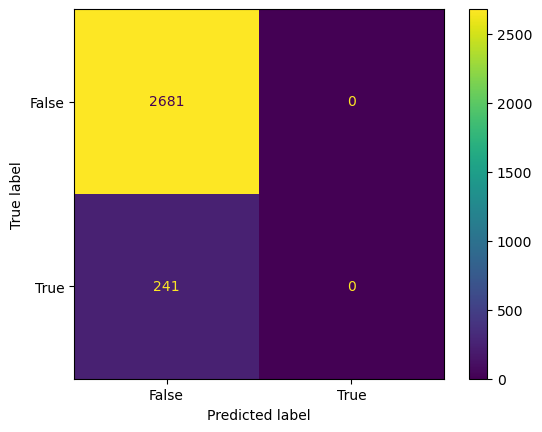

C:\Users\lauren\AppData\Local\Temp\ipykernel_10948\2639369885.py:33: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


,Precision,Recall,Accuracy,F1-Score
0,NaN,0.0,0.917522,NaN


In [82]:
#knn with 5 neighbors
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = ohencode_df[["years_experience", "years_college"]]

features_df = ohencode_df.drop('received_callback', axis=1)
#X = ohencode_df.loc[: ,ohencode_df.columns != 'received_callback']
#X = features_df.columns
y = ohencode_df["received_callback"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6) #get some true results when splitting test/training 50/50 (??)

k5 = KNeighborsClassifier(n_neighbors = 5)

k5.fit(X_train, y_train)

y_pred_5 = k5.predict(X_test)

conmatrix = metrics.confusion_matrix(y_test,y_pred_5)
conmatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conmatrix, display_labels = [False, True])
conmatrix_display.plot()
plt.show()


TN, FP, FN, TP = conmatrix.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
acc = (TP+TN)/(TP + FP + TN + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
results_df1 = pd.DataFrame({
    'Precision': [precision],
    'Recall': [recall],
    'Accuracy': [acc],
    'F1-Score': [f1_score]
})

display(results_df1)